<a href="https://colab.research.google.com/github/AzadMehedi/Pandas/blob/main/DateTime_in_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

# Creating Timestamp objects

In [2]:
# creating timestamp
pd.Timestamp('2023/1/5')

Timestamp('2023-01-05 00:00:00')

In [3]:
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# variation
pd.Timestamp('2023-1-5')

Timestamp('2023-01-05 00:00:00')

In [5]:
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [6]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [7]:
pd.Timestamp('5th january 2023')

Timestamp('2023-01-05 00:00:00')

In [8]:
# providing time also
pd.Timestamp('2023/1/5/9:31')

Timestamp('2023-01-05 09:31:00')

In [9]:
pd.Timestamp('2023, 1, 5, 9:31')

Timestamp('2023-01-05 09:31:00')

In [10]:
pd.Timestamp('5th january 2023 9:21AM')

Timestamp('2023-01-05 09:21:00')

In [11]:
# AM to PM


In [12]:
# using datetime.datetime object   (python object)
import datetime as dt
dt.datetime(2023,1,5,9,21,56)

datetime.datetime(2023, 1, 5, 9, 21, 56)

In [13]:
pd.Timestamp(dt.datetime(2023,1,5,9,21,56))  # can also use timestamp object on datetime

Timestamp('2023-01-05 09:21:56')

Main benifit of using Timestamp is we can fetch any information

In [14]:
# fetching attributes
import datetime as dt

x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [15]:
x.year

2023

In [16]:
x.month

1

In [17]:
x.day

5

In [18]:
x.hour

9

In [19]:
x.minute

21

In [20]:
x.second

56

## why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [21]:
import numpy as np
date = np.array('2023-01-05', dtype=np.datetime64)
date 

array('2023-01-05', dtype='datetime64[D]')

In [22]:
date + np.arange(12)

array(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
       '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
       '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

- single date store  -> use timestamp
- multiple date store  -> use datetimeindex

In [23]:
# from strings
pd.DatetimeIndex(['2023/1/5', '2023/2/6', '2023/3/7'])

DatetimeIndex(['2023-01-05', '2023-02-06', '2023-03-07'], dtype='datetime64[ns]', freq=None)

In [24]:
pd.DatetimeIndex(['2023/1/5', '2023/2/6', '2023/3/7'])[0]

Timestamp('2023-01-05 00:00:00')

In [25]:
type(pd.DatetimeIndex(['2023/1/5', '2023/2/6', '2023/3/7']))

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
type(pd.DatetimeIndex(['2023/1/5', '2023/2/6', '2023/3/7'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,5),dt.datetime(2023,1,6),dt.datetime(2023,1,7)])

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07'], dtype='datetime64[ns]', freq=None)

In [28]:
# using pd.timestamps
pd.DatetimeIndex([pd.Timestamp(2023,1,5),pd.Timestamp(2023,1,6),pd.Timestamp(2023,1,7)])

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07'], dtype='datetime64[ns]', freq=None)

In [29]:
# using datatimeindex as series index
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,5),pd.Timestamp(2023,1,6),pd.Timestamp(2023,1,7)])
pd.Series([1,2,3], index=dt_index)

2023-01-05    1
2023-01-06    2
2023-01-07    3
dtype: int64

# summary:
- `Timestamp`(panda's object): a moment in time is Timestamp. can store 6 things: year, month, day, hour, minite, second
- `DatetimeIndex`(oython object): bunch of Timestamps. can store multiple Timestamps.

# date_range function

In [30]:
# generate daily dates in a given range
pd.date_range('2023/1/1', end='2023/1/31', freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [31]:
# generate alternate dates in a given range using freq=2D
pd.date_range('2023/1/1', end='2023/1/31', freq='2D')

DatetimeIndex(['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07',
               '2023-01-09', '2023-01-11', '2023-01-13', '2023-01-15',
               '2023-01-17', '2023-01-19', '2023-01-21', '2023-01-23',
               '2023-01-25', '2023-01-27', '2023-01-29', '2023-01-31'],
              dtype='datetime64[ns]', freq='2D')

In [32]:
pd.date_range('2023/1/1', end='2023/1/31', freq='3D')

DatetimeIndex(['2023-01-01', '2023-01-04', '2023-01-07', '2023-01-10',
               '2023-01-13', '2023-01-16', '2023-01-19', '2023-01-22',
               '2023-01-25', '2023-01-28', '2023-01-31'],
              dtype='datetime64[ns]', freq='3D')

In [33]:
# B -> business days
pd.date_range('2023/1/1', end='2023/1/31', freq='B')  # monday - friday

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [34]:
# W -> one week per day
pd.date_range('2023/1/1', end='2023/1/31', freq='W')  #sunday

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [35]:
pd.date_range('2023/1/1', end='2023/1/31', freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [36]:
# H -> Hourly data(factor)
pd.date_range('2023/1/1', end='2023/2/28', freq='H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-02-27 15:00:00', '2023-02-27 16:00:00',
               '2023-02-27 17:00:00', '2023-02-27 18:00:00',
               '2023-02-27 19:00:00', '2023-02-27 20:00:00',
               '2023-02-27 21:00:00', '2023-02-27 22:00:00',
               '2023-02-27 23:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=1393, freq='H')

In [37]:
# H -> Hourly data(factor)
pd.date_range('2023/1/1', end='2023/2/28', freq='6H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 06:00:00',
               '2023-01-01 12:00:00', '2023-01-01 18:00:00',
               '2023-01-02 00:00:00', '2023-01-02 06:00:00',
               '2023-01-02 12:00:00', '2023-01-02 18:00:00',
               '2023-01-03 00:00:00', '2023-01-03 06:00:00',
               ...
               '2023-02-25 18:00:00', '2023-02-26 00:00:00',
               '2023-02-26 06:00:00', '2023-02-26 12:00:00',
               '2023-02-26 18:00:00', '2023-02-27 00:00:00',
               '2023-02-27 06:00:00', '2023-02-27 12:00:00',
               '2023-02-27 18:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=233, freq='6H')

In [38]:
# M -> Month end
pd.date_range('2023/1/1', end='2023/2/28', freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [39]:
# M -> Month start
pd.date_range('2023/1/1', end='2023/2/28', freq='MS')

DatetimeIndex(['2023-01-01', '2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [40]:
# A -> Year end
pd.date_range('2023/1/1', end='2030/2/28', freq='A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [41]:
# A -> Year start
pd.date_range(start='2023/1/5',end='2030/2/28',freq='AS')

DatetimeIndex(['2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01', '2029-01-01', '2030-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [42]:
# using periods(number of results)
pd.date_range(start='2023/1/5', periods=25, freq='D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# using periods(number of results)-> hourly
pd.date_range(start='2023/1/5', periods=25, freq='6H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 06:00:00',
               '2023-01-05 12:00:00', '2023-01-05 18:00:00',
               '2023-01-06 00:00:00', '2023-01-06 06:00:00',
               '2023-01-06 12:00:00', '2023-01-06 18:00:00',
               '2023-01-07 00:00:00', '2023-01-07 06:00:00',
               '2023-01-07 12:00:00', '2023-01-07 18:00:00',
               '2023-01-08 00:00:00', '2023-01-08 06:00:00',
               '2023-01-08 12:00:00', '2023-01-08 18:00:00',
               '2023-01-09 00:00:00', '2023-01-09 06:00:00',
               '2023-01-09 12:00:00', '2023-01-09 18:00:00',
               '2023-01-10 00:00:00', '2023-01-10 06:00:00',
               '2023-01-10 12:00:00', '2023-01-10 18:00:00',
               '2023-01-11 00:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [44]:
# upcoming month of 25th day
pd.date_range(start='2023/1/5', periods=25, freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='M')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [45]:
# simple series example
s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
s

0    2023/1/1
1    2022/1/1
2    2021/1/1
dtype: object

In [47]:
pd.to_datetime(s)   # transform into datetime object

0   2023-01-01
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [49]:
pd.to_datetime(s).dt.year

0    2023
1    2022
2    2021
dtype: int64

In [50]:
pd.to_datetime(s).dt.month

0    1
1    1
2    1
dtype: int64

In [51]:
pd.to_datetime(s).dt.day

0    1
1    1
2    1
dtype: int64

In [52]:
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [53]:
pd.to_datetime(s).dt.month_name()


0    January
1    January
2    January
dtype: object

In [58]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
print(s)
pd.to_datetime(s)

0      2023/1/1
1      2022/1/1
2    2021/130/1
dtype: object


ParserError: ignored

In [60]:
pd.to_datetime(s, errors='coerce')   # ignore error

0   2023-01-01
1   2022-01-01
2          NaT
dtype: datetime64[ns]

In [62]:
pd.to_datetime(s, errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [63]:
df = pd.read_csv('/content/expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [65]:
# converting Date column into a proper datetime
pd.to_datetime(df['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [69]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetime like properties of the Series values.

In [70]:
df['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int64

In [71]:
df['Date'].dt.month

0       3
1       3
2       3
3       3
4       3
       ..
272    11
273    11
274    11
275    11
276    11
Name: Date, Length: 277, dtype: int64

In [72]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [73]:
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [77]:
df['Date'].dt.is_month_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [78]:
df['Date'].dt.is_quarter_end


0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [79]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

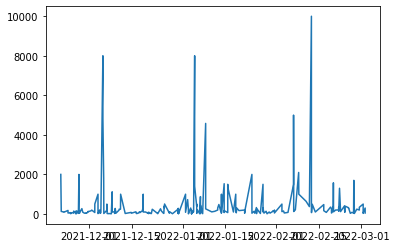

In [82]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])


In [88]:
# day name wise bar chart/month wise bar chart
df['day_name'] = df['Date'].dt.day_name()
df['day_name']


0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: day_name, Length: 277, dtype: object

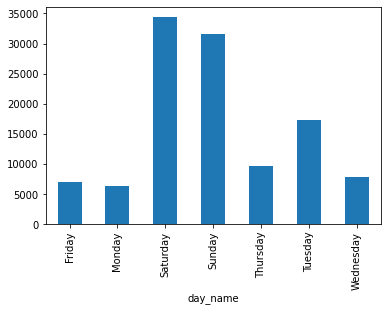

In [92]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')

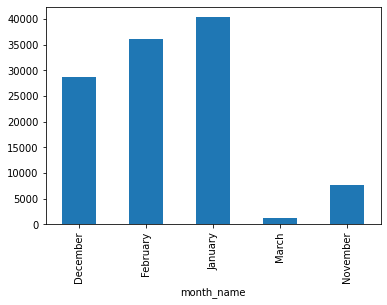

In [94]:
df['month_name'] = df['Date'].dt.month_name()
df.groupby('month_name')['INR'].sum().plot(kind='bar')
